In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from  sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
df.shape
print(f"Datte range of gold prices avaliable from -{df.loc[:,'Date'][0]} t0 {df.loc[:,'Date'][len(df)-1]}")


Datte range of gold prices avaliable from -1950-01 t0 2020-07


In [ ]:
date=pd.date_range (start="1/1/1950",end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [ ]:
df['month'] = date
df.drop('Date', axis =1, inplace= True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


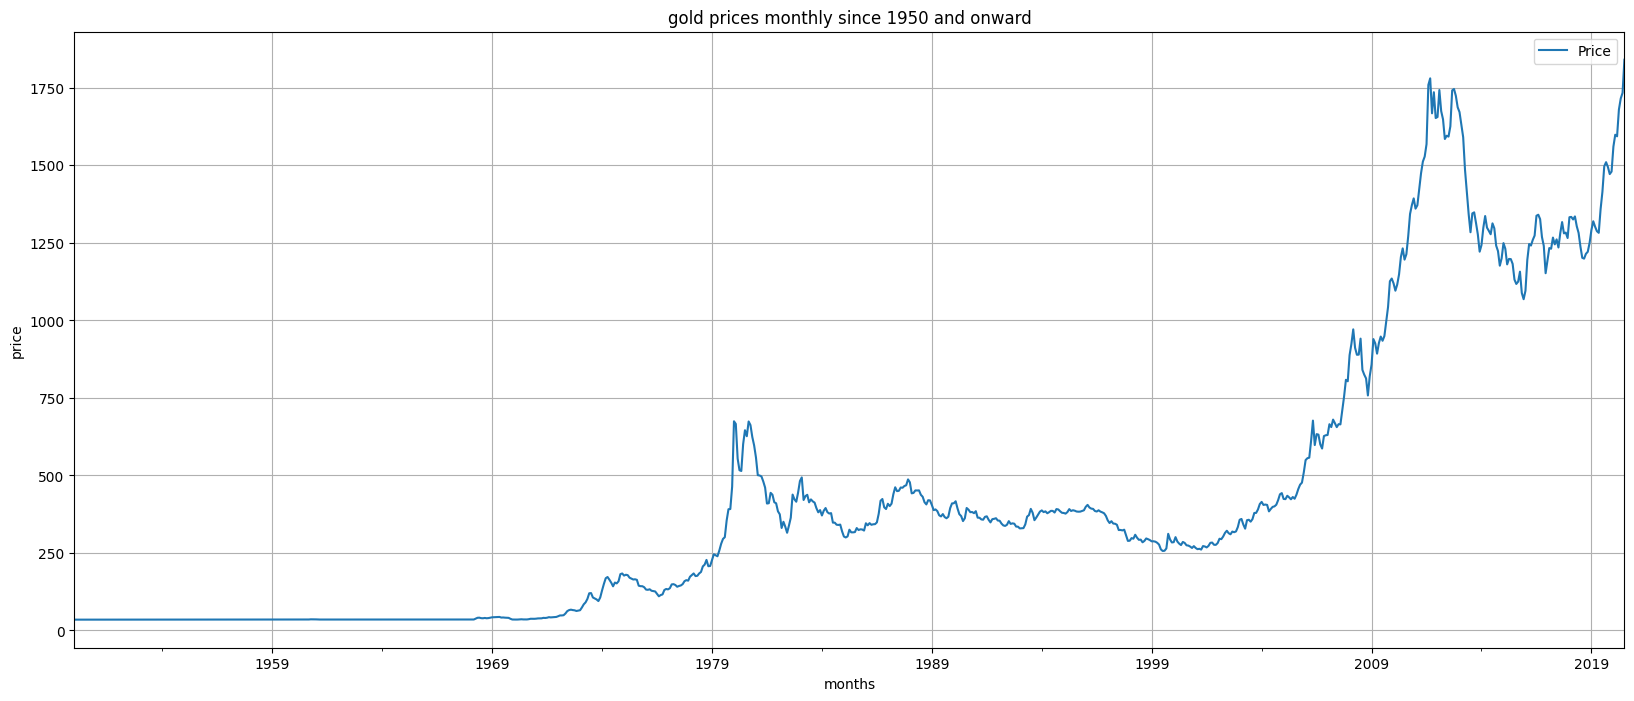

In [ ]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onward")
plt.xlabel('months')
plt.ylabel('price')
plt.grid()

In [ ]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


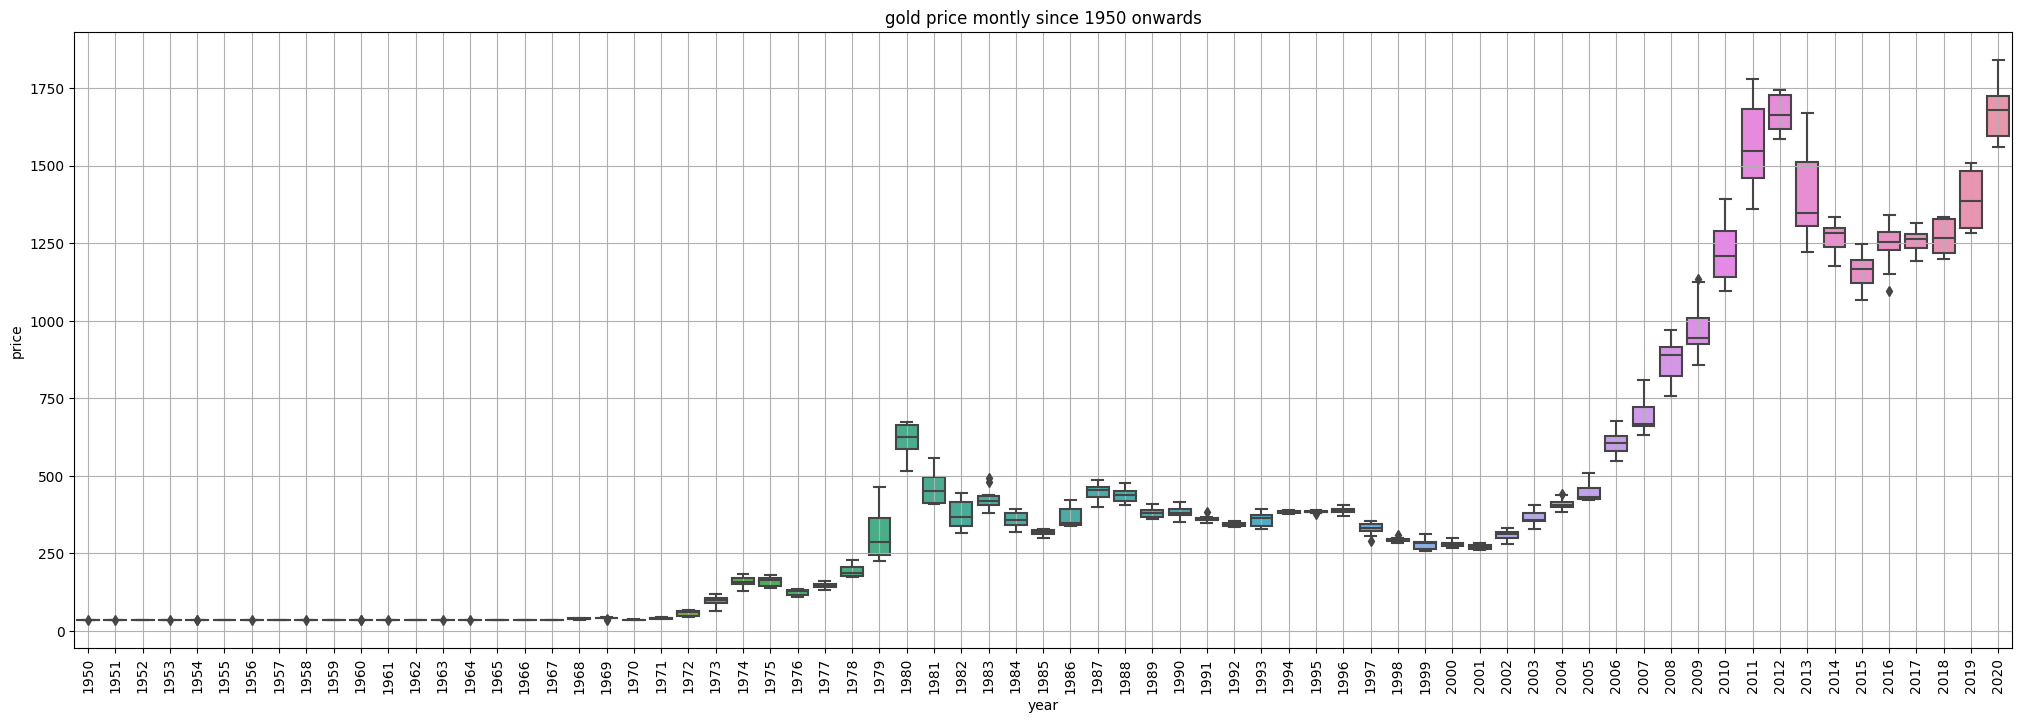

In [ ]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y=df.values[:,0], ax=ax)
plt.title('gold price montly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

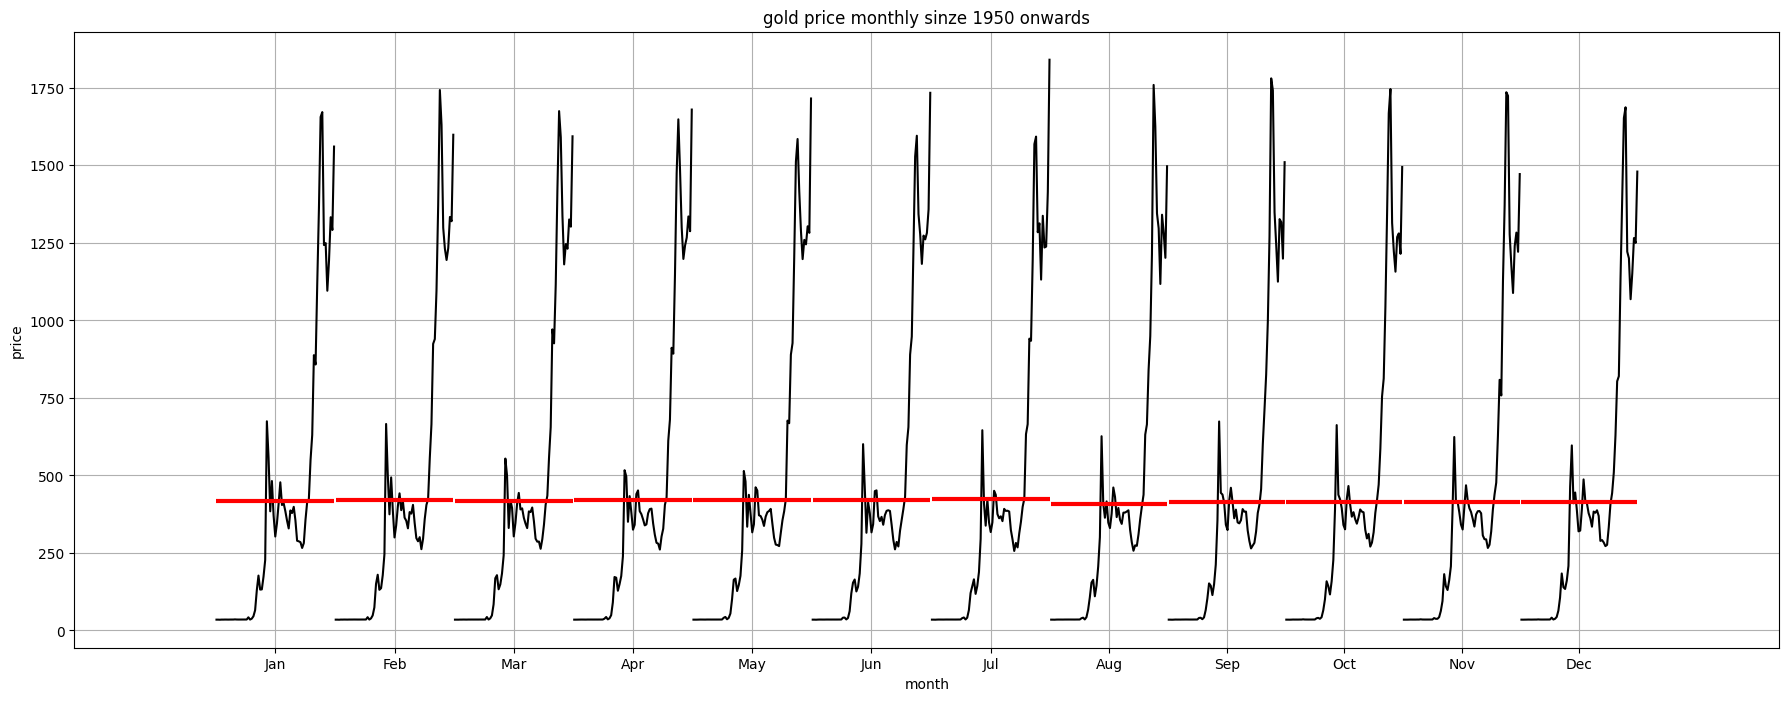

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax=plt.subplots(figsize=(22,8))
month_plot(df,ylabel='gold price',ax=ax)
plt.title('gold price monthly sinze 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

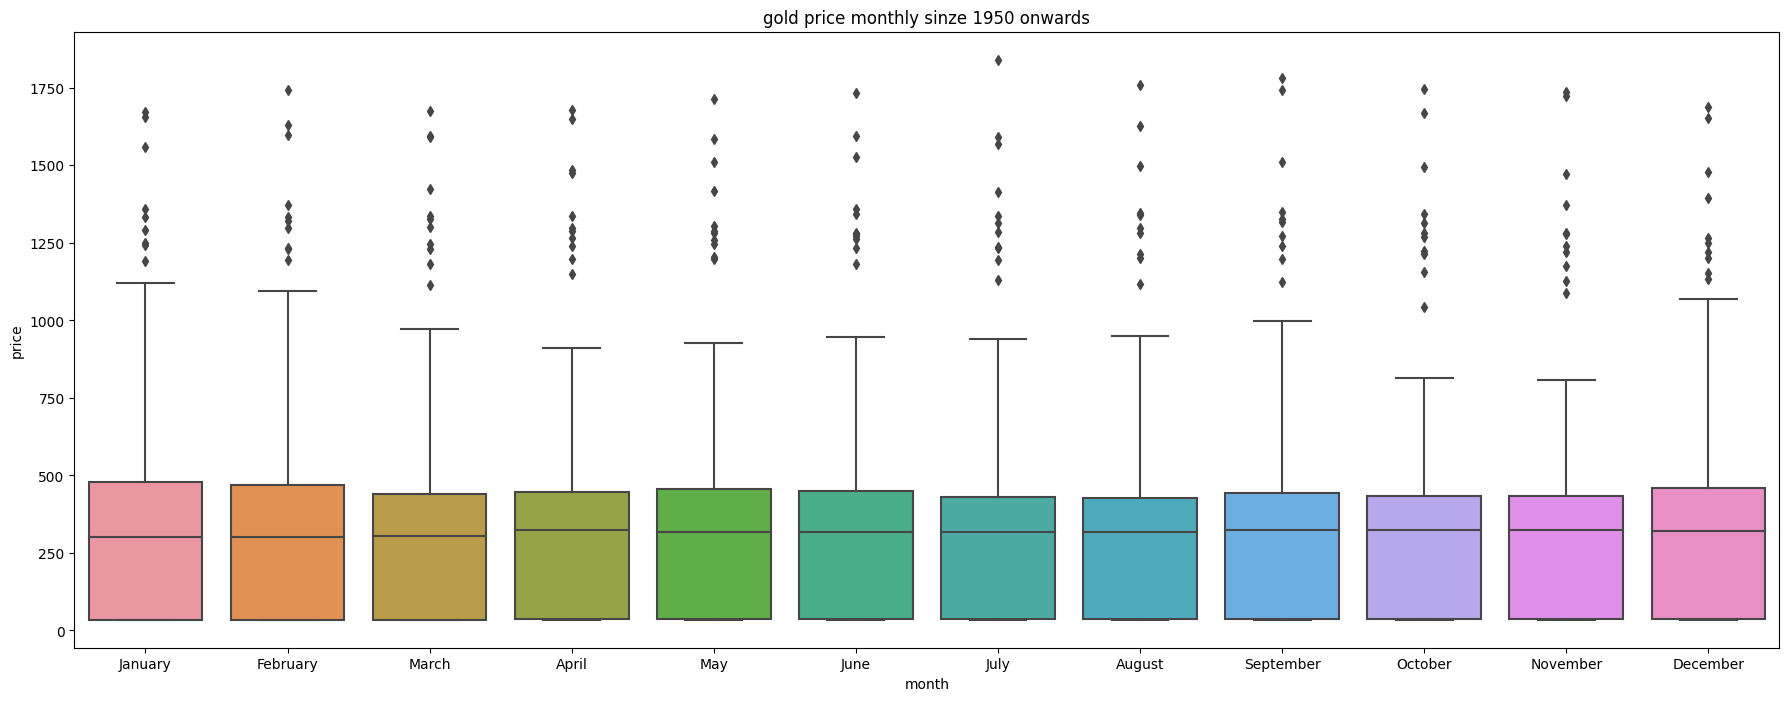

In [ ]:
_, ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[: ,0],ax=ax)
plt.title('gold price monthly sinze 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.show()

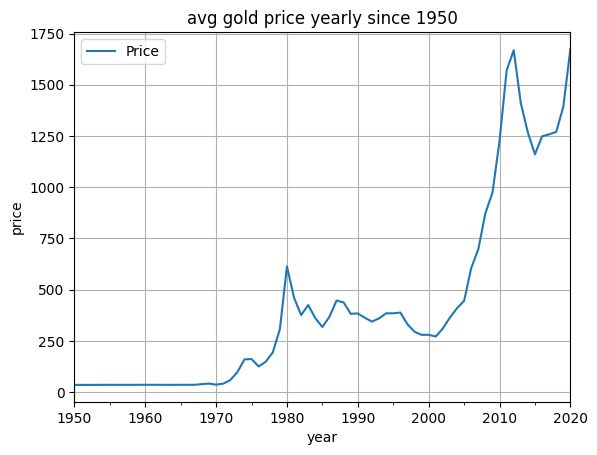

In [ ]:
df_yearly_sum=df.resample('A').mean()
df_yearly_sum.plot()
plt.title('avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

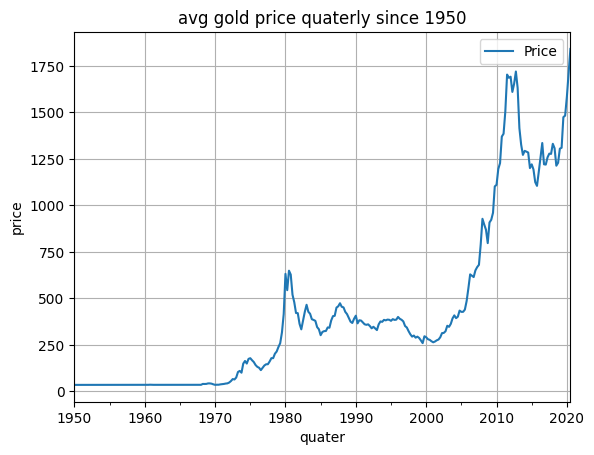

In [ ]:
df_quaterly_sum=df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title('avg gold price quaterly since 1950')
plt.xlabel('quater')
plt.ylabel('price')
plt.grid()

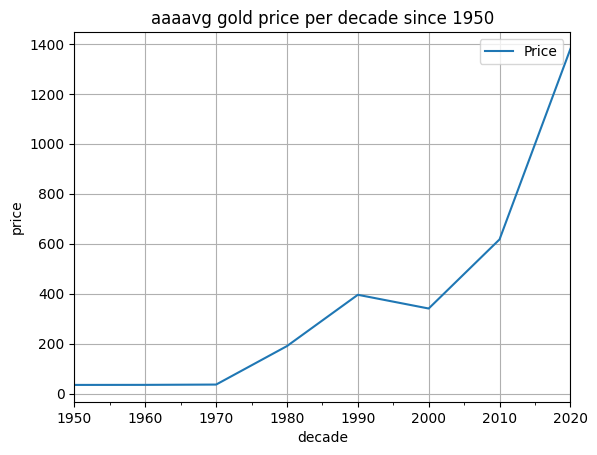

In [ ]:
df_decade_sum=df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('aaaavg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()

In [ ]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1=df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True, right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['Std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Cov_pct'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['Cov_pct'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['Mean', 'Std'], ['Std', 'Cov_pct']]], **{})
chart

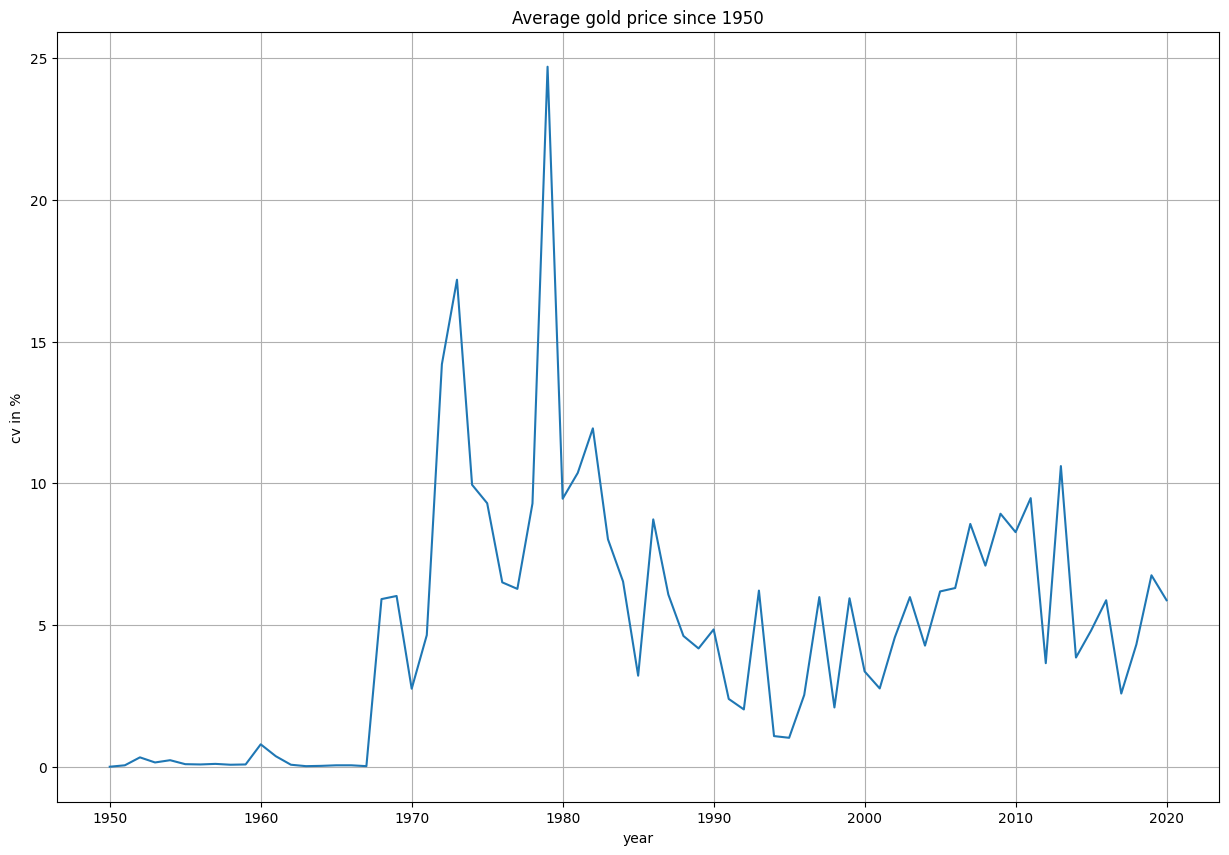

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title('Average gold price since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
# plt.show()
plt.grid()

In [ ]:
train =df[df.index.year<=2015]
test=df[df.index.year> 2015]
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


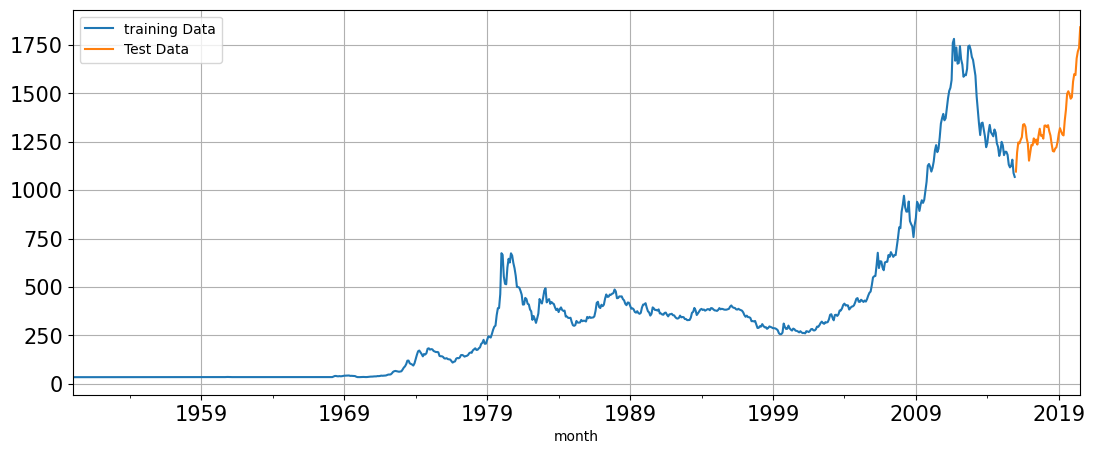

In [ ]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['training Data', 'Test Data'])
plt.show()

In [ ]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [ ]:
LR_train=train.copy()
LR_test=test.copy()

In [ ]:
LR_train['time']=train_time
LR_test['time']=test_time

In [ ]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values )

LinearRegression()

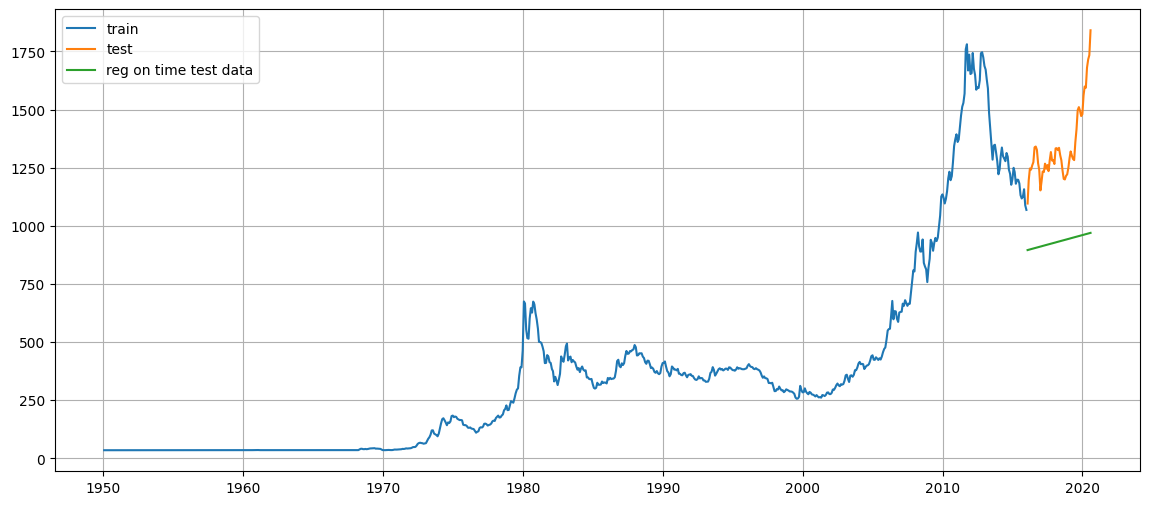

In [ ]:
test_predictions_model1=lr.predict(LR_test[["time"]])
LR_test['forecast']=test_predictions_model1
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'], label='reg on time test data')
plt.legend(loc='best')
plt.grid()

In [ ]:
def mape(actual,pred): return round((np.mean(abs(actual-pred)/actual))*100,2)

In [ ]:
mape_model1_test=mape(test['Price'].values,test_predictions_model1)
print('Mape is %3.3f'%(mape_model1_test),"%")

Mape is 29.760 %


In [ ]:
results=pd.DataFrame({'Test mape (%)': [mape_model1_test]},index=['RegressionOnTime'])
results

,Test mape (%)
RegressionOnTime,29.76


In [ ]:
Naive_train=train.copy()
Naive_test=test.copy()

Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

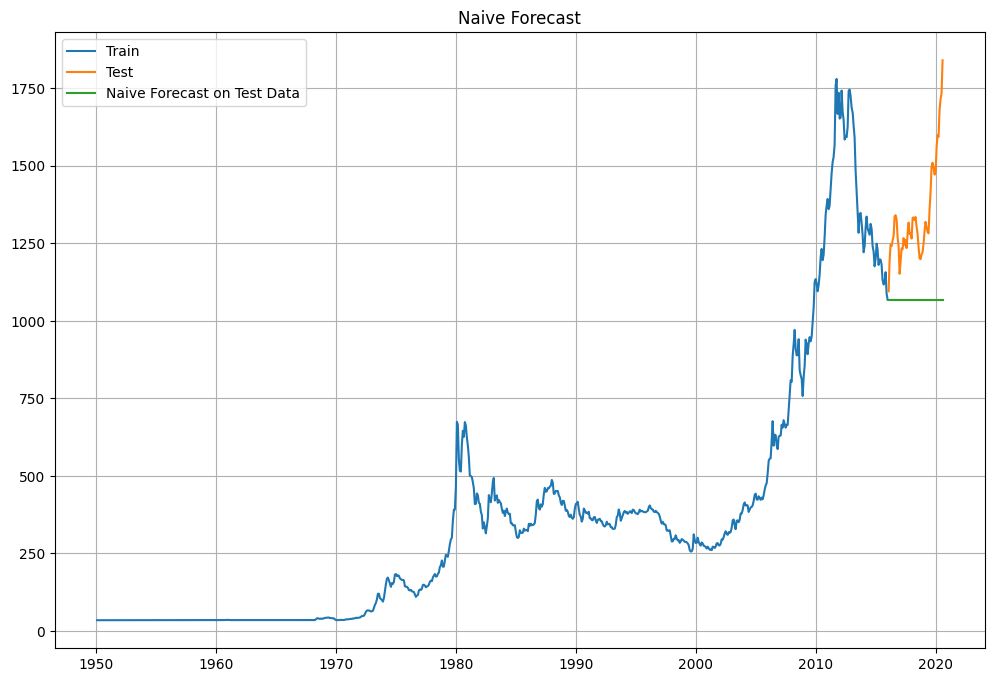

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid()

In [ ]:
mape_model2_test=mape(test['Price'].values,Naive_test['naive'].values)
print('For Naive forecast on the test data, Mape is %3.3f'%(mape_model2_test),"%")

For Naive forecast on the test data, Mape is 19.380 %


In [ ]:
resultsDf_2=pd.DataFrame({'Test mape (%)': [mape_model2_test]},index=['NaiveModel'])
results=pd.concat([results,resultsDf_2])
results

,Test mape (%)
RegressionOnTime,29.76
NaiveModel,19.38


In [ ]:
final_model=ExponentialSmoothing(df,
                                 trend='additive',
                                 seasonal='additive').fit(smoothing_level=0.4,
                                                          smoothing_trend=0.3,
                                                          smoothing_seasonal=0.6)

In [ ]:
Mape_final_model=mape(df['Price'].values, final_model.fittedvalues)
print('Mape:', Mape_final_model)


Mape: 17.24


In [ ]:
prediction=final_model.forecast(steps=len(test))

In [ ]:
pred_df=pd.DataFrame({'lower_CI' : prediction - 1.96*np.std(final_model.resid,ddof=1),
                     'prediction':prediction,
                     'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


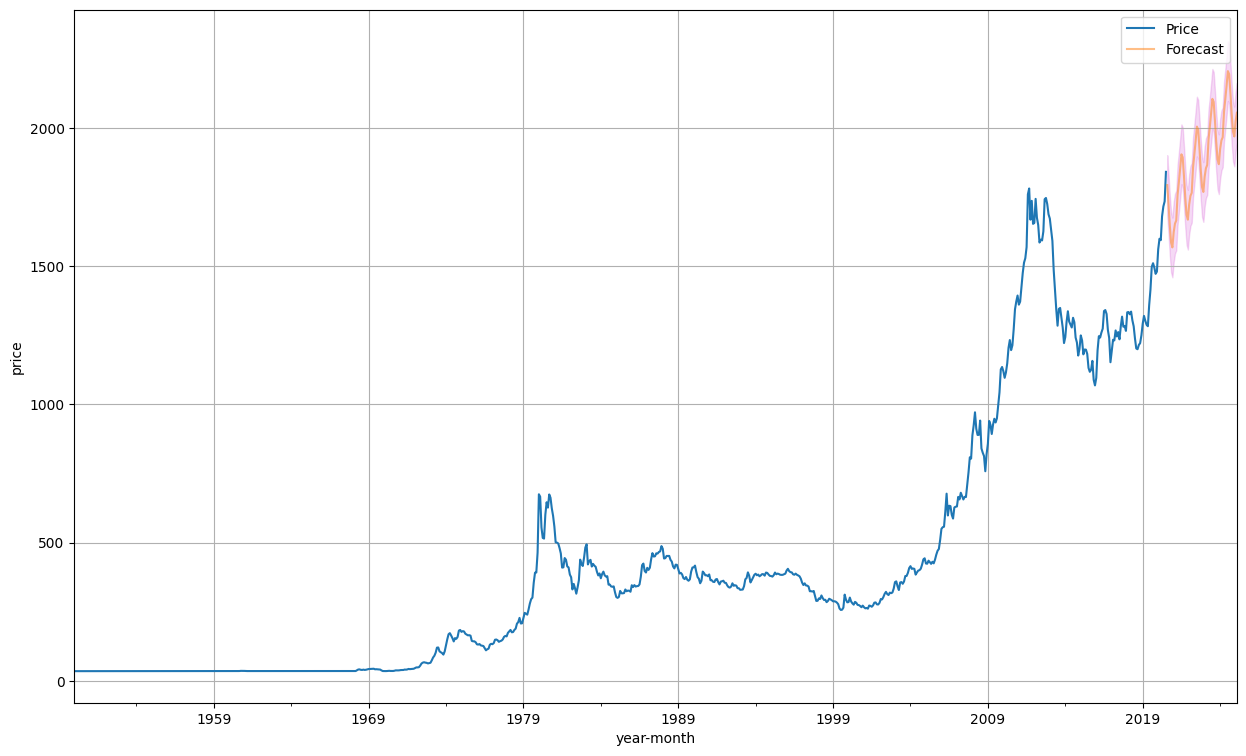

In [ ]:
axis=df.plot(label='Actual', figsize=(15,9))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'], color='m', alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()